In [11]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import datetime
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

stocks_data = pd.read_csv('./top200_training.csv' )
stocks_data = stocks_data.drop(columns=['證券代碼'])

data_years = stocks_data['年月'].unique()
data_years

array([199712, 199812, 199912, 200012, 200112, 200212, 200312, 200412,
       200512, 200612, 200712, 200812, 200912], dtype=int64)

In [23]:
train_years = 3
train_data = stocks_data[stocks_data['年月'].isin(data_years[:train_years])]
train_data_label = train_data['Return']
train_data = train_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])

test_data = stocks_data[stocks_data['年月'].isin(data_years[train_years:-1])]
test_data_label = test_data['Return']
test_data = test_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])
test_data

,市值(百萬元),收盤價(元)_年,本益比,股價淨值比,股價營收比,M淨值報酬率─稅後,資產報酬率ROA,營業利益率OPM,利潤邊際NPM,負債/淨值比,M流動比率,M速動比率,M存貨週轉率 (次),M應收帳款週轉次,M營業利益成長率,M稅後淨利成長率
600,917615,25.59,4.4816,1.20250,2.00080,0.175540,0.248430,0.368810,0.391740,0.41519,194.72,144.11,8.81,7.98,175.23,182.77
601,723579,32.85,7.8029,0.94342,1.69590,0.087169,0.120920,0.288240,0.217320,0.38722,52.38,38.66,26.88,8.27,1.66,-2.48
602,538011,27.33,5.7903,1.42120,2.70330,0.163920,0.221650,0.411240,0.439240,0.35219,229.79,200.14,8.24,8.46,1067.02,144.61
603,239728,29.94,4.2110,0.98293,0.44468,0.117000,0.233460,0.106920,0.105610,0.99543,175.03,113.35,6.37,5.36,42.67,38.88
604,194643,14.65,3.6443,0.61169,0.49426,0.068596,0.147700,0.082707,0.135690,1.15320,124.17,66.15,4.58,6.08,16.42,73.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,7017,13.36,16.2927,1.03570,1.07140,0.040638,0.063769,0.056461,0.066008,0.56921,151.44,142.25,55.08,5.87,422.13,204.16
2396,6914,20.86,3.8066,0.73919,0.85703,0.096904,0.194010,0.238600,0.224990,1.00210,196.61,0.95,0.34,57.69,34.14,28.63
2397,6908,78.58,7.8501,2.32210,2.40820,0.190530,0.295880,0.357490,0.306910,0.55297,492.64,419.83,4.27,4.69,25.99,24.24
2398,6864,39.35,6.5474,0.85395,0.67059,0.072553,0.127940,0.133720,0.100470,0.76343,126.66,70.88,3.38,5.64,-33.76,-39.77


In [20]:
# regressor = tree.DecisionTreeRegressor(max_depth=20, random_state=1)
# (56, 20, 0.001, 0.001, 0.09448818897637795, 0.4931875, 1)
# (94, 25, 0.001, 0.001, 0.13385826771653542, 0.485375, 0)
'''
    Random Forest 35 bit
    n_estimators        : 31 ~ 158 = range 0~127 = 6bit         樹的數量
    max_depth           : 10 ~ 41 = range 0~31 = 4bit           最大深度
    min_samples_split   : 0.0 ~ 100.0 = range 0 ~ 127 = 6 bit   內部節點需要的最小sample數量
    min_samples_leaf    : 0.0 ~ 100.0 = range 0 ~ 127 = 6 bit   葉子至少需要的sample數量
    max_features        : 0.0 ~ 100.0 = range 0 ~ 127 = 6 bit   每個決策最多用到的features數量
    max_samples         : 0.0 ~ 100.0 = range 0 ~ 127 = 6 bit   每棵樹使用的sample數量
    oob_score           : 0 or 1                                是否使用out of bag

'''


regressor = RandomForestRegressor(n_estimators = 93 ,
                                max_depth = 25 , 
                                min_samples_split =  0.001 ,
                                min_samples_leaf = 0.001,     
                                max_features = 0.14960629921259844 , 
                                max_samples = 0.485375 ,
                                random_state = 0 , 
                                n_jobs = -1 , 
                                oob_score= 1)

regressor.fit(train_data, train_data_label)  #訓練 fit(Data, Label)
#train_score = cross_val_score(regressor, train_data, train_data_label , cv=10).mean()
train_score = regressor.score(train_data , train_data_label )
val_score  = regressor.score(test_data , test_data_label )

print(train_score , "\n" , val_score)
#regressor.score(train_data, train_data_label)

c:\Users\arthu\anaconda3\envs\AIFT\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


0.6852374545989528 
 -0.11912856666106175


4828.89997481514


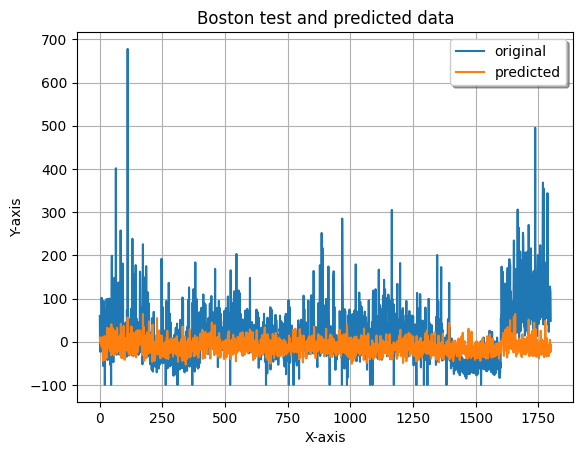

In [21]:

test_data_pred = regressor.predict(test_data)
mse = mean_squared_error(test_data_label , test_data_pred)
print(mse)
test_data_label = test_data_label.reset_index(drop=True)
test_data_label.to_numpy()
#print(test_data_label.to_numpy())
#print(type(test_data_pred))

plt.plot(range(len(test_data)), test_data_label, label="original")
plt.plot(range(len(test_data)), test_data_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   

854.4560516631495


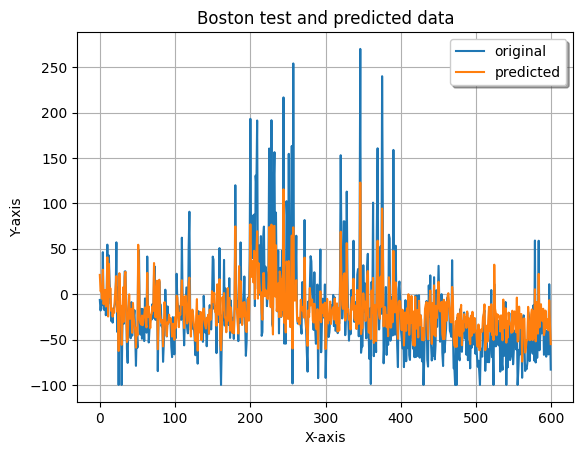

In [22]:

train_data_pred = regressor.predict(train_data)
mse = mean_squared_error(train_data_label , train_data_pred)
print(mse)
test_data_label = test_data_label.reset_index(drop=True)
test_data_label.to_numpy()
#print(test_data_label.to_numpy())
#print(type(test_data_pred))

plt.plot(range(len(train_data)), train_data_label, label="original")
plt.plot(range(len(train_data)), train_data_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   